(sec:ErrorPropagationIII)=
# Error propagation (III): A useful approximation

For practical purposes, we are often satisfied to approximate PDFs with Gaussians. Within such limits there is an easier method that is often used for error propagation. Note, however, that there are instances when this method fails miserably as will be shown in the example further down.

Suppose that we have summarized the PDFs $\pdf{x}{I}$ and $\pdf{y}{I}$ as two Gaussians with mean and standard deviation $x_0, \sigma_x$ and $y_0, \sigma_y$, respectively. Assume further that these two variables are not correlated, i.e., $\pdf{x,y}{I} = \pdf{x}{I} \pdf{y}{I}$.

Suppose now that we are interested in $Z=X-Y$. Intuitively, we might guess that the best estimate $z_0 = x_0 - y_0$, but the standard deviation $\sigma_z$ requires some more thought. Differentiate the relation 

\begin{equation}
\delta Z = \delta X - \delta Y.
\end{equation}

For error bars, we are interested in this relation around the optimum, i.e., $\delta X = X - x_0$ and so on. Square both sides and integrate to get the expectation value

\begin{equation}
\expect{\delta Z^2} = \expect{\delta X^2 + \delta Y^2 - 2 \delta X \delta Y}  = \expect{\delta X^2} + \expect {\delta Y^2} - 2 \expect{\delta X \delta Y},
\end{equation}

where we have employed the linear property for an integral over a sum of terms.

Since we study the differential relation around the optimum, and we assumed that the PDFs for $X$ and $Y$ were described by independent Gaussians, we get

$$
\expect{\delta X^2} = \sigma_x^2; \qquad \expect{\delta Y^2} = \sigma_y^2; \qquad \expect{\delta X \delta Y} = 0,
$$ (eq:stddev)

and we find that

\begin{equation}
\sigma_z = \sqrt{ \expect{\delta Z^2} } = \sqrt{ \sigma_x^2 + \sigma_y^2 }.
\end{equation}

````{prf:example} Inferring galactic distances---revisited
:label: example:BayesianAdvantage:inferring-galactic-distances-revisited

Consider, as a second example, the ratio of two parameters $Z = X/Y$ that appeared in {prf:ref}`example:BayesianAdvantage:inferring-galactic-distances` (in which we wanted to infer $x = v/H$). Differentiation gives

\begin{equation}
\delta Z = \frac{Y \delta X - X \delta Y}{Y^2} \quad \Leftrightarrow \quad \frac{\delta Z}{Z} = \frac{\delta X}{X} - \frac{\delta Y}{Y}.
\end{equation}

Squaring both sides and taking the expectation values, we obtain

\begin{equation}
\frac{\expect{\delta Z^2}}{z_0^2} = \frac{\expect{\delta X^2}}{x_0^2} + \frac{\expect{\delta Y^2}}{y_0^2} - 2 \frac{\expect{\delta X} \expect{\delta Y}}{x_0 y_0},
\end{equation}

where the $X$, $Y$ and $Z$ in the denominator have been replaced by the constants $x_0$, $y_0$ and $z_0 = x_0 / y_0$ because we are interested in deviations from the peak of the PDF.

Finally, substituting the information for the PDFs of $X$ and $Y$ as summarized in Eq. {eq}`eq:stddev` we finally obtain the propagated error for the ratio

\begin{equation}
\frac{\sigma_z}{z_0} = \sqrt{ \left( \frac{\sigma_x}{x_0} \right)^2 + \left( \frac{\sigma_y}{y_0} \right)^2}.
\end{equation}
````

```{exercise} Gaussian sum of errors
:label: exercise:BayesianAdvantages:gaussian-sum-of-errors

Consider $Z=X+Y$ (again) and derive a PDF for $Z$ assuming Gaussian errors in $X$ and $Y$. Compare with the result from the full convolution of  PDFs in {prf:ref}`example:BayesianAdvantage:Z=X+Y`.
```

```{exercise} Gaussian product of errors
:label: exercise:BayesianAdvantages:gaussian-product-of-errors

Consider $Z=XY$ and derive a PDF for $Z$ assuming Gaussian errors in $X$ and $Y$. 
```


Despite its virtues, let us end our discussion of error-propagation with a salutary warning against the blind use of this nifty short cut.


```{prf:example} Taking the square root of a number
:label: example:BayesianAdvantage:taking-square-root

* Assume that the amplitude of a Bragg peak is measured with an uncertainty $A = A_0 \pm \sigma_A$ from a least-squares fit to experimental data.
* The Bragg peak amplitude is proportional to the square of a complex structure function: $A = |F|^2 \equiv f^2$.
* What is $f = f_0 \pm \sigma_f$?

Obviously, we have that $f_0 = \sqrt{A_0}$. Differentiate the relation, square and take the expectation value

\begin{equation}
\expect{\delta A^2} = 4 f_0^2 \expect{\delta f^2} \quad 
\Leftrightarrow \quad 
\sigma_f = \frac{\sigma_A}{2 \sqrt{A_0}},
\end{equation}

where we have used the Gaussian approximation for the PDFs.

But what happens if the best fit gives $A_0 < 0$, which would not be impossible if we have weak and strongly overlapping peaks. The above equation obviously does not work since $f_0$ would be a complex number.

We have made two mistakes:
1. Likelihood is not posterior!
2. The Gaussian approximation around the peak does not always work.

Consider first the best fit of the signal peak. It implies that the likelihood can be approximated by

\begin{equation}
\pdf{\data}{A,I} \propto \exp \left[ -\frac{(A-A_0)^2}{2\sigma_A^2} \right].
\end{equation}

However, the posterior for $A$ is $\pdf{A}{{\data},I} \propto \pdf{\data}{A,I} \pdf{A}{I}$ and we should use the fact that we know that $A \ge 0$.

We will incorporate this information through a simple step-function prior

\begin{equation}
\pdf{A}{I} = \left\{
\begin{array}{ll}
\frac{1}{A_\mathrm{max}}, & 0 \le A \le A_\mathrm{max}, \\
0, & \mathrm{otherwise}.
\end{array}
\right.
\end{equation}

This implies that the posterior will be a truncated Gaussian, and its maximum will always be above zero.

This also implies that we cannot use the Gaussian approximation. Instead we will do the proper calculation using the transformation {eq}`eq:BayesianAdvantage:transformation`

\begin{equation}
p(f|{\data},I) = \pdf{A}{{\data},I} \left| \frac{dA}{df} \right| = 2 f \pdf{A}{{\data},I}
\end{equation}

In the end we find the proper Bayesian error propagation given by the PDF

\begin{equation}
p(f|{\data},I) \propto \left\{
\begin{array}{ll}
f \exp \left[ -\frac{(A-A_0)^2}{2\sigma_A^2} \right], & 0 \le f \le \sqrt{A_\mathrm{max}}, \\
0, & \mathrm{otherwise}.
\end{array}
\right.
\end{equation}

{numref}`fig-example-BayesianAdvantage-taking-square-root` visualize the difference between the Bayesian and the naive error propagation for a few scenarios. The code to generate these plots is in the hidden cell below.

```

```{glue:figure} Af_fig
:name: fig-example-BayesianAdvantage-taking-square-root

The left-hand panels show the posterior PDF for the amplitude of a Bragg peak in three different scenarios. The right-hand plots are the corresponding PDFs for the modulus of the structure factor $f=\sqrt{A}$. The solid lines correspond to a full Bayesian error propagation, while the dashed lines are obtained with the short-cut error propagation.
```

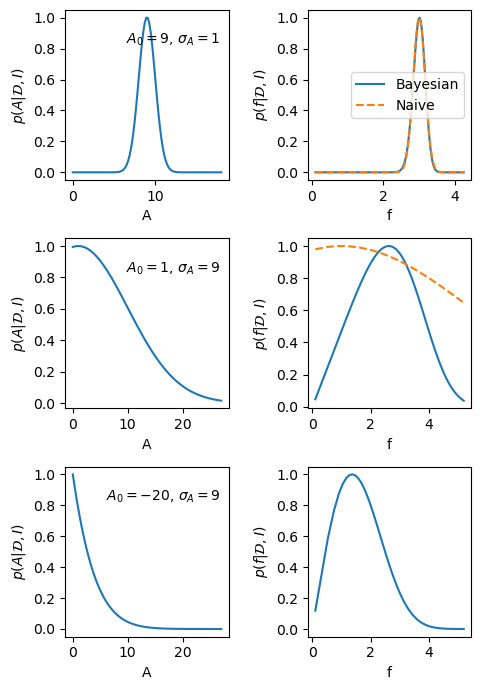

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue

def A_posterior(A,A0,sigA):
    pA = np.exp(-(A-A0)**2/(2*sigA**2))
    return pA/np.max(pA)

# Wrong analysis
def f_likelihood(f,A0,sigA):
    sigf = sigA / (2*np.sqrt(A0))
    pf = np.exp(-(f-np.sqrt(A0))**2/(2*sigf**2))
    return pf/np.max(pf)

# Correct error propagation
def f_posterior(f,A0,sigA):
    pf = f*np.exp(-(f**2-A0)**2/(2*sigA**2))
    return pf/np.max(pf)
    
fig_Af,axs=plt.subplots(3,2,figsize=(5,7))
for iA, (A0,sigA) in enumerate([(9,1),(1,9),(-20,9)]):
    maxA = max(2*A0,3*sigA)
    A_arr = np.linspace(0.01,maxA,100)
    f_arr = np.sqrt(A_arr)
    axs[iA,0].plot(A_arr,A_posterior(A_arr,A0,sigA))
    axs[iA,1].plot(f_arr,f_posterior(f_arr,A0,sigA),label='Bayesian')
    if A0>0:
        axs[iA,1].plot(f_arr,f_likelihood(f_arr,A0,sigA),'--',label='Naive')
    axs[iA,0].set(xlabel='A',ylabel=r'$p(A | \mathcal{D},I)$')
    axs[iA,0].text(0.95,0.8,f'$A_0={A0}$, $\sigma_A={sigA}$', \
    	horizontalalignment='right',\
    	transform=axs[iA,0].transAxes,fontsize=10)
    axs[iA,1].set(xlabel='f',ylabel=r'$p(f | \mathcal{D},I)$')
axs[0,1].legend(loc='best')
fig_Af.tight_layout()
glue(f"Af_fig", fig_Af, display=False)